# How-to consume OGC Services and Encodings

![title](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmundogeo.com%2Fwp-content%2Fuploads%2F2014%2F06%2FOGC_Logo.jpg&f=1&nofb=1)

In this nb we will cover the following standards:
* WFS
* WMTS
* GML
* GeoPackage
* GeoTIFF

## Web Feature Service (WFS)

In [ ]:
#! pip install owslib

In [95]:
import owslib

In [96]:
from owslib.wfs import WebFeatureService

In [97]:
# Retrieve API key

In [98]:
from configparser import ConfigParser

In [99]:
parser = ConfigParser()

In [100]:
parser.read('notebook.cfg')

['notebook.cfg']

In [101]:
key = parser['os_data_hub']['key']

In [102]:
#Instantiate the service

In [103]:
wfs_url = 'https://api.os.uk/features/v1/wfs?key='

In [104]:
wfs11 = WebFeatureService(url=wfs_url + key, version='1.1.0')

In [ ]:
#Get title

In [105]:
wfs11.identification.title

'WFS'

In [106]:
#List operations

In [107]:
[operation.name for operation in wfs11.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [ ]:
#List feature types

In [108]:
list(wfs11.contents)

['osfeatures:Sites_AccessPoint',
 'osfeatures:Sites_FunctionalSite',
 'osfeatures:Sites_RoutingPoint',
 'osfeatures:OpenUPRN_Address',
 'osfeatures:OpenTOID_TopographyLayer',
 'osfeatures:OpenTOID_HighwaysNetwork',
 'osfeatures:OpenTOID_SitesLayer',
 'osfeatures:OpenUSRN_USRN',
 'osfeatures:Zoomstack_Airports',
 'osfeatures:Zoomstack_RailwayStations',
 'osfeatures:Zoomstack_Names',
 'osfeatures:Zoomstack_Boundaries',
 'osfeatures:Zoomstack_Contours',
 'osfeatures:Zoomstack_DistrictBuildings',
 'osfeatures:Zoomstack_Waterlines',
 'osfeatures:Zoomstack_RoadsRegional',
 'osfeatures:Zoomstack_RoadsNational',
 'osfeatures:Zoomstack_RoadsLocal',
 'osfeatures:Zoomstack_Rail',
 'osfeatures:Zoomstack_ETL',
 'osfeatures:Zoomstack_Woodland',
 'osfeatures:Zoomstack_UrbanAreas',
 'osfeatures:Zoomstack_Surfacewater',
 'osfeatures:Zoomstack_Sites',
 'osfeatures:Zoomstack_NationalParks',
 'osfeatures:Zoomstack_LocalBuildings',
 'osfeatures:Zoomstack_Greenspace',
 'osfeatures:Zoomstack_Foreshore',
 'os

In [109]:
len(list(wfs11.contents))

48

In [ ]:
#Download data, using parameters

In [ ]:
#EPSG:27700

In [110]:
response = wfs11.getfeature(typename='osfeatures:Sites_AccessPoint', srsname='urn:x-ogc:def:crs:EPSG:27700')

In [111]:
response.read()

b'<?xml version="1.0" encoding="utf-8" ?>\n<wfs:FeatureCollection xmlns:xs="http://www.w3.org/2001/XMLSchema" xmlns:wfs="http://www.opengis.net/wfs" xmlns:gml="http://www.opengis.net/gml" xmlns:osfeatures="http://www.ordnancesurvey.co.uk/osfeatures/1.0" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" timeStamp="2021-10-06T09:01:44Z" numberOfFeatures="unknown" xsi:schemaLocation="http://www.opengis.net/wfs http://schemas.opengis.net/wfs/1.1.0/wfs.xsd http://www.opengis.net/gml http://schemas.opengis.net/gml/3.1.1/base/gml.xsd http://www.ordnancesurvey.co.uk/osfeatures/1.0 https://api.os.uk/features/v1/wfs?key=ZJh5XA3tDYp9irYQGX0i8GOELikMuV0w&amp;service=wfs&amp;version=1.1.0&amp;request=DescribeFeatureType">\n<gml:boundedBy>\n  <gml:Envelope srsName="urn:ogc:def:crs:EPSG::27700">\n    <gml:lowerCorner>186691.9699999997 171200.8300000001</gml:lowerCorner>\n    <gml:upperCorner>349679.6299999999 382135.2699999996</gml:upperCorner>\n  </gml:

In [112]:
response = wfs11.getfeature(typename='osfeatures:Sites_AccessPoint', srsname='urn:x-ogc:def:crs:EPSG:27700')

In [113]:
#Dump the results to a GML file

In [114]:
out = open('data.gml', 'wb')
out.write(bytes(response.read()))
out.close()

## Web Map Tile Service (WMTS)

In [ ]:
#! pip install folium

In [115]:
import folium

In [116]:
pars = {'key': key, 'service': 'WMTS', 
        'request': 'GetTile', 'version': '2.0.0', 'height': 256, 'width': 256,
        'outputFormat': 'image/png', 'style': 'default', 'layer': 'Outdoor_3857', 'tileMatrixSet': 'EPSG:3857' }

In [ ]:
#queryString ='key=' + apiKey + '&service=WMTS&request=GetTile&version=2.0.0&height=256&width=256&outputFormat=image/png&style=default&layer=Light_3857&tileMatrixSet=EPSG:3857&tileMatrix={z}&tileRow={y}&tileCol={x}'

In [117]:
queryString = 'key=%s&service=%s&request=%s&version=%s&height=%d&width=%d&outputFormat=%s&style=%s&layer=%s&tileMatrixSet=%s&tileMatrix={z}&tileRow={y}&tileCol={x}' %(pars['key'],pars['service'],pars['request'],pars['version'],pars['height'],pars['width'],pars['outputFormat'],pars['style'],pars['layer'],pars['tileMatrixSet'])

In [118]:
wmts_url = 'https://api.os.uk/maps/raster/v1/wmts?'

In [119]:
#wmts_url + '&' + queryString

In [120]:
folium.Map(location=[55.3617609, -3.4433238],
           zoom_start=7,
           tiles= wmts_url + '&' + queryString,
           attr='Ordnance Survey')

## Read Files 

In [ ]:
# Use Geopandas and Rasterio

In [ ]:
#! pip install geopandas

In [121]:
import geopandas as gpd

In [122]:
layer = gpd.read_file('data.gml')

In [123]:
layer

,gml_id,OBJECTID,TOID,Version,VersionDate,ReasonForChange,RefToFunctionalSite,AccessType,RefToRoutingPoint,RefToITNRoadNode,ITNRoadNodeVersionDate,geometry
0,Sites_AccessPoint.1,1,osgb4000000073339066,1,2016-06-21T00:00:00,New,osgb4000000073300107,"Motor Vehicles,Pedestrian",osgb4000000073910631,None,None,POINT (313907.460 209067.280)
1,Sites_AccessPoint.2,2,osgb4000000073339067,1,2016-06-21T00:00:00,New,osgb4000000073300107,Pedestrian,osgb4000000073910632,None,None,POINT (313950.050 209067.850)
2,Sites_AccessPoint.3,3,osgb4000000073339077,1,2016-06-21T00:00:00,New,osgb4000000073300112,"Motor Vehicles,Pedestrian",osgb4000000073923174,None,None,POINT (326322.300 181996.550)
3,Sites_AccessPoint.4,4,osgb4000000073339078,1,2016-06-21T00:00:00,New,osgb4000000073300112,"Motor Vehicles,Pedestrian",osgb4000000073923175,None,None,POINT (326333.420 181981.350)
4,Sites_AccessPoint.5,5,osgb4000000073339091,1,2016-06-21T00:00:00,New,osgb4000000073300122,"Motor Vehicles,Pedestrian",None,osgb4000000017704462,2005-09-12T00:00:00,POINT (313975.930 209244.960)
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sites_AccessPoint.96,96,osgb4000000073347587,1,2016-06-21T00:00:00,New,osgb4000000073304468,"Motor Vehicles,Pedestrian",osgb4000000073921253,None,None,POINT (311191.590 207695.030)
96,Sites_AccessPoint.97,97,osgb4000000073347678,3,2019-03-18T00:00:00,Attributes,osgb4000000073304509,Pedestrian,osgb4000000073921771,None,None,POINT (265415.870 194441.940)
97,Sites_AccessPoint.98,98,osgb4000000073347877,1,2016-06-21T00:00:00,New,osgb4000000073304608,"Motor Vehicles,Pedestrian",None,osgb4000000017250085,2006-11-13T00:00:00,POINT (242585.230 221154.000)
98,Sites_AccessPoint.99,99,osgb4000000073347879,1,2016-06-21T00:00:00,New,osgb4000000073304608,"Motor Vehicles,Pedestrian",osgb4000000073925287,None,None,POINT (242742.870 221326.330)


<AxesSubplot:>

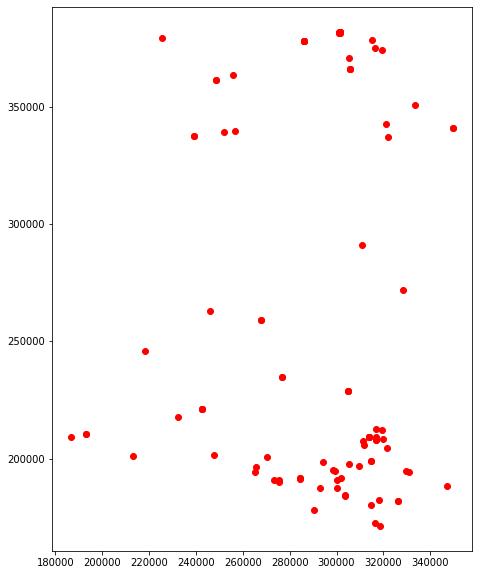

In [124]:
layer.plot(color='red', marker='o', figsize=(15, 10))

In [125]:
gpkg = gpd.read_file('bdline_gpkg_gb/data/bdline_gb.gpkg')
#gpkg = gpd.read_file('zip:///Users/joana/Downloads/bdline_gpkg_gb.zip!data')

In [126]:
gpkg

,Name,Area_Description,geometry
0,Bedfordshire,Ceremonial County,"MULTIPOLYGON (((527179.004 248224.996, 527162...."
1,Berkshire,Ceremonial County,"MULTIPOLYGON (((504919.202 178392.095, 504918...."
2,Buckinghamshire,Ceremonial County,"MULTIPOLYGON (((505704.800 185453.304, 505704...."
3,Cambridgeshire,Ceremonial County,"MULTIPOLYGON (((571833.397 261707.896, 571813...."
4,Cheshire,Ceremonial County,"MULTIPOLYGON (((401780.298 370227.103, 401778...."
...,...,...,...
86,Western Isles,Ceremonial County,"MULTIPOLYGON (((152467.798 935008.696, 152466...."
87,Orkney,Ceremonial County,"MULTIPOLYGON (((358840.094 1005993.747, 358836..."
88,Shetland,Ceremonial County,"MULTIPOLYGON (((452147.497 1206082.502, 452148..."
89,Cornwall,Ceremonial County,"MULTIPOLYGON (((234782.596 86837.002, 234797.0..."


<AxesSubplot:>

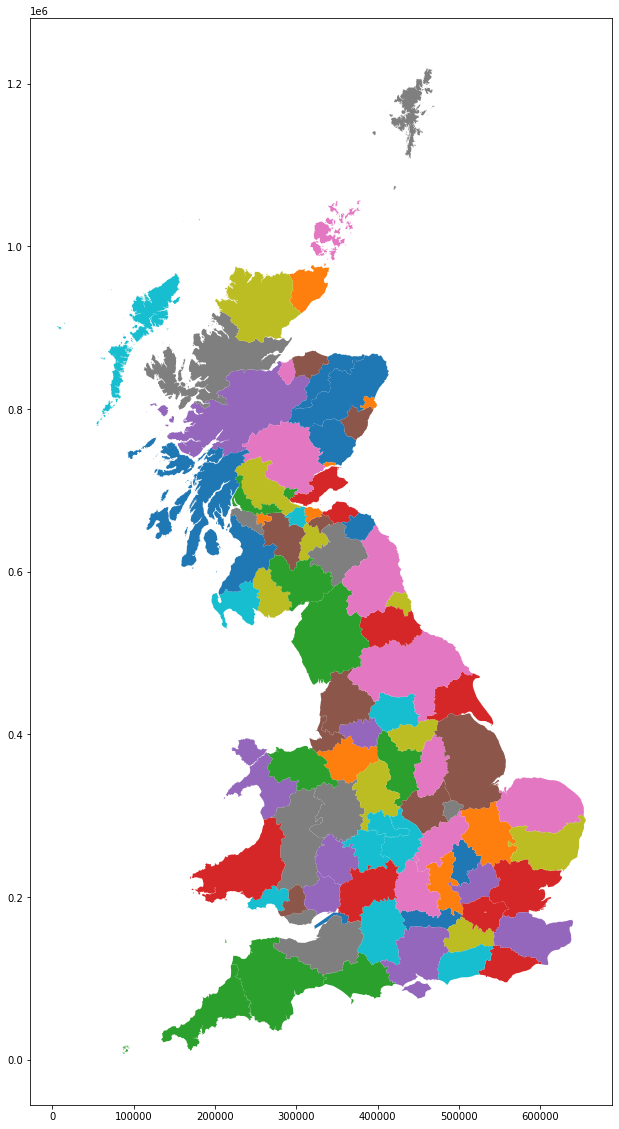

In [127]:
gpkg.plot(column="Name",
    figsize=(30, 20))

In [ ]:
#! pip install rasterio

In [128]:
import rasterio

In [129]:
from rasterio.plot import show

In [130]:
#!pip install matplotlib

In [131]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [133]:
src = rasterio.open("ras250_gb/data/SU.tif")

In [134]:
array=src.read(1)

In [135]:
array.shape

(4000, 4000)

https://matplotlib.org/stable/tutorials/colors/colormaps.html

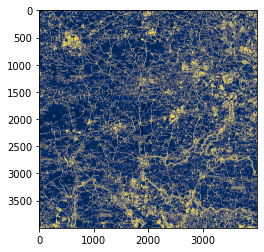

In [136]:
plt.imshow(array, cmap='cividis')

In [137]:
src.close()